<a href="https://colab.research.google.com/github/kartik-kartik/Noise-Removal-U-net/blob/master/audio_noise_Unet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#download sample audio signal files , no need to run these first 2 steps while running as these
# signals will be download and upload to gdrive and mount it to colab so no need to download everytime we run this
!wget http://groups.inf.ed.ac.uk/ami/download/temp/amiBuild-164536-Wed-Sep-2-2020.wget.sh

--2020-09-02 16:46:06--  http://groups.inf.ed.ac.uk/ami/download/temp/amiBuild-164536-Wed-Sep-2-2020.wget.sh
Resolving groups.inf.ed.ac.uk (groups.inf.ed.ac.uk)... 129.215.202.26
Connecting to groups.inf.ed.ac.uk (groups.inf.ed.ac.uk)|129.215.202.26|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6361 (6.2K) [application/x-sh]
Saving to: ‘amiBuild-164536-Wed-Sep-2-2020.wget.sh’

amiBuild-164536-Wed 100%[===================>]   6.21K  --.-KB/s    in 0s      

2020-09-02 16:46:07 (501 MB/s) - ‘amiBuild-164536-Wed-Sep-2-2020.wget.sh’ saved [6361/6361]



In [2]:
!sh amiBuild-164536-Wed-Sep-2-2020.wget.sh

--2020-09-02 16:46:20--  http://groups.inf.ed.ac.uk/ami/AMICorpusMirror//amicorpus/ES2008a/audio/ES2008a.Array1-01.wav
Resolving groups.inf.ed.ac.uk (groups.inf.ed.ac.uk)... 129.215.202.26
Connecting to groups.inf.ed.ac.uk (groups.inf.ed.ac.uk)|129.215.202.26|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33387564 (32M) [audio/x-wav]
Saving to: ‘amicorpus/ES2008a/audio/ES2008a.Array1-01.wav’

ES2008a.Array1-01.w 100%[===================>]  31.84M  7.17MB/s    in 5.0s    

2020-09-02 16:46:26 (6.38 MB/s) - ‘amicorpus/ES2008a/audio/ES2008a.Array1-01.wav’ saved [33387564/33387564]

--2020-09-02 16:46:26--  http://groups.inf.ed.ac.uk/ami/AMICorpusMirror//amicorpus/ES2008a/audio/ES2008a.Array1-02.wav
Resolving groups.inf.ed.ac.uk (groups.inf.ed.ac.uk)... 129.215.202.26
Connecting to groups.inf.ed.ac.uk (groups.inf.ed.ac.uk)|129.215.202.26|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33387564 (32M) [audio/x-wav]
Saving to: ‘amicorpus/ES20

In [3]:
#after files downloaded and uploaded to gdrive , we will mount it to colab to access the files
#after mounting the file path /content/drive/My Drive/audio_signals

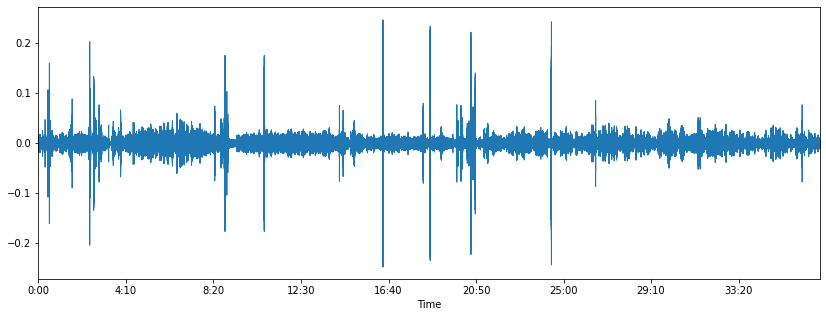

In [1]:
import librosa
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

# instead of loop over all files in the current directory ending with .wav  we just plot only one single file to view 
#to check all uncomment the below line  and comment fname ="/content/drive/My Drive/audio_signals/ES2008b.Array1-01.wav"
#for fname in glob("/content/drive/My Drive/audio_signals/*.wav"):
fname ="/content/drive/My Drive/audio_signals/ES2008b.Array1-01.wav"
x , sr = librosa.load(fname)
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x,sr=sr)

In [2]:
#now we have to to add noise to signals , so below is to create noise
#Noise signals create
def get_white_noise(signal,SNR) :
    #RMS value of signal
    RMS_s=math.sqrt(np.mean(signal**2))
    #RMS values of noise
    RMS_n=math.sqrt(RMS_s**2/(pow(10,SNR/20)))
    #Additive white gausian noise. Thereore mean=0
    #Because sample length is large (typically > 40000)
    #we can use the population formula for standard daviation.
    #because mean=0 STD=RMS
    STD_n=RMS_n
    noise=np.random.normal(0, STD_n, signal.shape[0])
    return noise

In [3]:
import math
signal=np.interp(x, (x.min(), x.max()), (-1, 1))
noise=get_white_noise(signal,SNR=10)

In [4]:
#Adding noise to audio signals this segment 

X = []
pad = lambda a, i: a[0: i] if a.shape[0] > i else np.hstack((a, np.zeros(i - a.shape[0])))
import matplotlib.pyplot as plt
for fname in glob("/content/drive/My Drive/audio_signals/*.wav"):
  #sr,x = wavfile.read(fname)
  x , sr = librosa.load(fname)
  signal=np.interp(x, (x.min(), x.max()), (-1, 1))
  noise=get_white_noise(signal,SNR=10)
  signal_noise=signal+noise
  padded = pad(signal_noise, 16384)
  X.append(padded)
  #fig, ax = plt.subplots(figsize=(10,4))
  #ax.plot(signal_noise)
  #plt.plot(signal_noise)

In [5]:
###run this to merge all original signals  into single list so we can have training data as original audio
 #and target data as noise signals
X_org = []
pad = lambda a, i: a[0: i] if a.shape[0] > i else np.hstack((a, np.zeros(i - a.shape[0])))
for fname in glob("/content/drive/My Drive/audio_signals/*.wav"):
  x , sr = librosa.load(fname)
  padded = pad(x, 16384)
  X_org.append(padded)

In [6]:
#stack these as col featurs
X=np.vstack(X)

In [7]:
X.shape

(8, 16384)

In [8]:
X_org=np.vstack(X_org)

In [9]:
X_org.shape

(8, 16384)

In [10]:
#split into train test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X,X_org,test_size=0.1)

In [11]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(7, 16384) (1, 16384) (7, 16384) (1, 16384)


In [12]:
#reshape
X_train=X_train.reshape(128,128,7)
y_train=y_train.reshape(128,128,7)
X_test=X_test.reshape(128,128,1)
y_test=y_test.reshape(128,128,1)

In [13]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, LeakyReLU, MaxPooling2D, Dropout, concatenate, UpSampling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend
import tensorflow as tf

In [14]:
##resahping it again to avoid dimensional error
X_train = X_train.reshape(7,128,128,1)
y_train=y_train.reshape(7,128,128,1)
X_test=X_test.reshape(1,128,128,1)
y_test=y_test.reshape(1,128,128,1)

In [17]:
#define U-net architecture
input_size = (128,128,1)
size_filter_in = 16
#normal initialization of weights
kernel_init = 'he_normal'
#we are applying leaky relu after the conv layer , so we made it simple conv layer (kind of regression)
activation_layer = None
inputs = Input(input_size)
conv1 = Conv2D(size_filter_in, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(inputs)
conv1 = LeakyReLU()(conv1)
conv1 = Conv2D(size_filter_in, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv1)
conv1 = LeakyReLU()(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(size_filter_in*2, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(pool1)
conv2 = LeakyReLU()(conv2)
conv2 = Conv2D(size_filter_in*2, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv2)
conv2 = LeakyReLU()(conv2)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(size_filter_in*4, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(pool2)
conv3 = LeakyReLU()(conv3)
conv3 = Conv2D(size_filter_in*4, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv3)
conv3 = LeakyReLU()(conv3)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
conv4 = Conv2D(size_filter_in*8, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(pool3)
conv4 = LeakyReLU()(conv4)
conv4 = Conv2D(size_filter_in*8, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv4)
conv4 = LeakyReLU()(conv4)
drop4 = Dropout(0.5)(conv4)
pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

conv5 = Conv2D(size_filter_in*16, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(pool4)
conv5 = LeakyReLU()(conv5)
conv5 = Conv2D(size_filter_in*16, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv5)
conv5 = LeakyReLU()(conv5)
drop5 = Dropout(0.5)(conv5)

up6 = Conv2D(size_filter_in*8, 2, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(UpSampling2D(size = (2,2))(drop5))
up6 = LeakyReLU()(up6)
merge6 = concatenate([drop4,up6], axis = 3)
conv6 = Conv2D(size_filter_in*8, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(merge6)
conv6 = LeakyReLU()(conv6)
conv6 = Conv2D(size_filter_in*8, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv6)
conv6 = LeakyReLU()(conv6)
up7 = Conv2D(size_filter_in*4, 2, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(UpSampling2D(size = (2,2))(conv6))
up7 = LeakyReLU()(up7)
merge7 = concatenate([conv3,up7], axis = 3)
conv7 = Conv2D(size_filter_in*4, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(merge7)
conv7 = LeakyReLU()(conv7)
conv7 = Conv2D(size_filter_in*4, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv7)
conv7 = LeakyReLU()(conv7)
up8 = Conv2D(size_filter_in*2, 2, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(UpSampling2D(size = (2,2))(conv7))
up8 = LeakyReLU()(up8)
merge8 = concatenate([conv2,up8], axis = 3)
conv8 = Conv2D(size_filter_in*2, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(merge8)
conv8 = LeakyReLU()(conv8)
conv8 = Conv2D(size_filter_in*2, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv8)
conv8 = LeakyReLU()(conv8)

up9 = Conv2D(size_filter_in, 2, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(UpSampling2D(size = (2,2))(conv8))
up9 = LeakyReLU()(up9)
merge9 = concatenate([conv1,up9], axis = 3)
conv9 = Conv2D(size_filter_in, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(merge9)
conv9 = LeakyReLU()(conv9)
conv9 = Conv2D(size_filter_in, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv9)
conv9 = LeakyReLU()(conv9)
conv9 = Conv2D(2, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv9)
conv9 = LeakyReLU()(conv9)
conv10 = Conv2D(1, 1, activation = 'tanh')(conv9)

In [18]:
model = Model(inputs,conv10)

In [19]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.Huber(), metrics = ['mae'])
#from tensorflow.keras.optimizers import SGD
#sgd=SGD(learning_rate=0.0001, momentum=0.0, nesterov=False)
#model.compile(optimizer = sgd, loss = tf.keras.losses.Huber(), metrics = ['mae'])

In [20]:
%load_ext tensorboard
from datetime import datetime
from tensorflow import keras
logdir = "logs/scalars/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

In [21]:
#model training
model.fit(X_train,y_train,
              epochs=50,
              batch_size=1,
             shuffle=True,
            validation_data=(X_test,y_test),callbacks=[tensorboard_callback],)

Epoch 1/50
1/7 [===>..........................] - ETA: 0s - loss: 0.0171 - mae: 0.1472WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
7/7 [==============================] - 0s 70ms/step - loss: 0.0252 - mae: 0.1448 - val_loss: 3.9307e-04 - val_mae: 0.0212
Epoch 2/50
7/7 [==============================] - 0s 13ms/step - loss: 0.0079 - mae: 0.0742 - val_loss: 6.1026e-04 - val_mae: 0.0329
Epoch 3/50
7/7 [==============================] - 0s 12ms/step - loss: 0.0250 - mae: 0.1163 - val_loss: 0.0014 - val_mae: 0.0448
Epoch 4/50
7/7 [==============================] - 0s 13ms/step - loss: 0.1038 - mae: 0.2883 - val_loss: 0.0633 - val_mae: 0.3201
Epoch 5/50
7/7 [==============================] - 0s 13ms/step - loss: 0.2165 - mae: 0.4909 - val_loss: 0.1376 - val_mae: 0

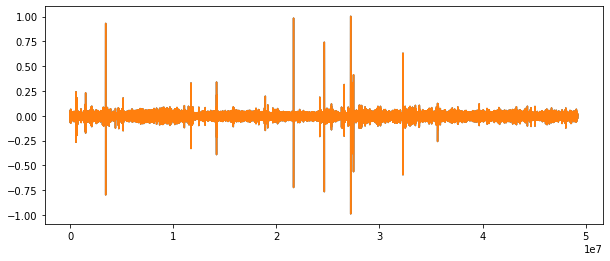

In [22]:
#after training completed ,we will test it on a audio signal  file 
#read a test signal,add noise and pad it ,make it similar to train data shape and use the model to donoise it
## /content/ES2008b.Array2-01.wav this file , uploaded to colab manually as its test , its also available gdrive
X_test = []
pad = lambda a, i: a[0: i] if a.shape[0] > i else np.hstack((a, np.zeros(i - a.shape[0])))
import matplotlib.pyplot as plt
for fname in glob("/content/ES2008b.Array2-01.wav"):
  #sr,x = wavfile.read(fname)
  x , sr = librosa.load(fname)
  signal=np.interp(x, (x.min(), x.max()), (-1, 1))
  noise=get_white_noise(signal,SNR=10)
  signal_noise=signal+noise
  padded = pad(signal_noise, 16384)
  X_test.append(padded)
  fig, ax = plt.subplots(figsize=(10,4))
  ax.plot(signal_noise)
  plt.plot(signal_noise)

In [23]:
X_test=np.vstack(X_test)

In [24]:
X_test.shape

(1, 16384)

In [25]:
X_test = X_test.reshape(1,128,128,1)
X_test.shape

(1, 128, 128, 1)

In [26]:
#predict , denoise 
y=model.predict(X_test)

In [27]:
y.shape

(1, 128, 128, 1)

In [28]:
y=y.reshape(16384,1)

In [29]:
#write it to check signal , it will be available in drive after writing for temprorary period
librosa.output.write_wav("clean_signal.wav",y,sr=sr)

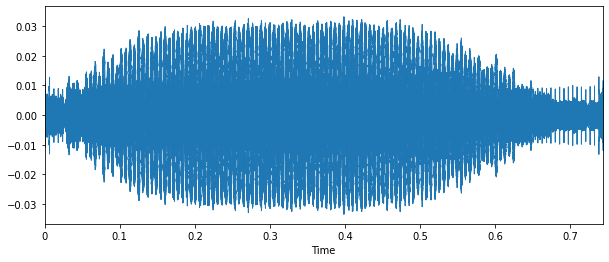

In [30]:
#now plot the cleaned audio file , 
import librosa
fname="/content/clean_signal.wav"
x , sr = librosa.load(fname)
import librosa.display
plt.figure(figsize=(10, 4))
librosa.display.waveplot(x,sr=sr)

In [31]:
#PLOTTING ORIGINAL FILE after padding to easy comparision

In [32]:
X_test.shape

(1, 128, 128, 1)

In [33]:
X_test1=X_test.reshape(16384,1)

In [34]:
librosa.output.write_wav("Original.wav",X_test1,sr=sr)

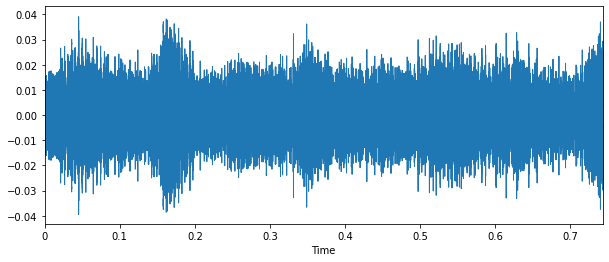

In [35]:
fname="/content/Original.wav"
x , sr = librosa.load(fname)
import librosa.display
plt.figure(figsize=(10, 4))
librosa.display.waveplot(x,sr=sr)